## Plot Secondary Structure Prediction Values Compared to Dipeptide Stability Effects

### Load libraries and analysis specific parameters

In [1]:
library(Biostrings)
library(tidyverse)
library(rasilabRtemplates)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading required package: GenomeInfoDb


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:



### Read in dipeptide mRNA level effects

- Generated in `plot_8xdicodon_effects.ipynb`


In [19]:
dipeptide_lfc <- read_tsv("../tables/8xdipeptide_lfc.tsv.gz") %>% 
  print()

Rows: 441 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): dicodon, diaa, codon1, codon2, aa1, aa2
dbl (6): insert_num, count_grna, count_mrna, n_barcodes_grna, n_barcodes_mrn...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 441 × 12
   insert_num dicodon diaa  codon1 codon2 aa1   aa2   count_grna count…¹ n_bar…²
        <dbl> <chr>   <chr> <chr>  <chr>  <chr> <chr>      <dbl>   <dbl>   <dbl>
 1       2608 GGATAA  G*    GGA    TAA    G     *         178222   22193     146
 2       3136 TACAAA  YK    TAC    AAA    Y     K          96768   15509     104
 3        529 AGACAC  RH    AGA    CAC    R     H         125059   20163     180
 4        304 ACATAA  T*    ACA    TAA    T     *         309339   59506     360
 5       1096 CACAGA  HR    CAC    AGA    H     R         159427   31199     249
 6        560 AGATAA  R*    AGA    TAA    R     *         234307   48011     277
 7        780 ATAATA  II    ATA    ATA    I     I         197432   40966     206
 8       2816 GTAAAA  VK    GTA    AAA    V     K         106782   22871     137
 9         44 AAAGTA  KV    AAA    GTA    K     V         169872   36908     226
10         12 AAAATA  KI    AAA    ATA    K     I          71876   16166     110
# … wit

### Read in Chou Fasman secondary structure prediction values

- Compiled a table with alpha helix and beta sheet prediction values, based on [Chou and Fasman 1978](https://pubmed.ncbi.nlm.nih.gov/4358939/). These values are denoted “chou_alpha” and “chou_beta”.

- Also added the overall prediction values from [Fujiwara2012](https://bmcstructbiol.biomedcentral.com/articles/10.1186/1472-6807-12-18)

In [3]:
chou_fasman_values <- read_csv("../tables/chou_fasman_propensities.csv") %>% 
  arrange(desc(chou_beta)) %>% 
  pivot_longer(-aa, names_to = "propensity") %>% 
  print()

Rows: 20 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): aa
dbl (8): exposed_alpha, buried_alpha, total_alpha, exposed_beta, buried_beta...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 160 × 3
   aa    propensity    value
   <chr> <chr>         <dbl>
 1 V     exposed_alpha  0.83
 2 V     buried_alpha   0.89
 3 V     total_alpha    0.91
 4 V     exposed_beta   2.31
 5 V     buried_beta    1.57
 6 V     total_beta     2   
 7 V     chou_alpha     1.06
 8 V     chou_beta      1.7 
 9 I     exposed_alpha  0.96
10 I     buried_alpha   1.01
# … with 150 more rows


### Plot lysine dipeptide effects against Chou-Fasman values

- Take the average effects of lysine in the 1st and 2nd position, for each dipeptide combination

# A tibble: 160 × 14
   insert_num dicodon diaa  codon1 codon2 aa    count_…¹ count…² n_bar…³ n_bar…⁴
        <dbl> <chr>   <chr> <chr>  <chr>  <chr>    <dbl>   <dbl>   <dbl>   <dbl>
 1         44 AAAGTA  KV    AAA    GTA    V       169872   36908     226     167
 2         44 AAAGTA  KV    AAA    GTA    V       169872   36908     226     167
 3         44 AAAGTA  KV    AAA    GTA    V       169872   36908     226     167
 4         44 AAAGTA  KV    AAA    GTA    V       169872   36908     226     167
 5         44 AAAGTA  KV    AAA    GTA    V       169872   36908     226     167
 6         44 AAAGTA  KV    AAA    GTA    V       169872   36908     226     167
 7         44 AAAGTA  KV    AAA    GTA    V       169872   36908     226     167
 8         44 AAAGTA  KV    AAA    GTA    V       169872   36908     226     167
 9         12 AAAATA  IK    AAA    ATA    I        71876   16166     110      72
10         12 AAAATA  IK    AAA    ATA    I        71876   16166     110      72
# … wit

Warning message in cor.test.default(x = c(-2.2448756176373, -1.67828378829284, -2.26910750244463, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.2448756176373, -1.67828378829284, -2.26910750244463, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.2448756176373, -1.67828378829284, -2.26910750244463, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.2448756176373, -1.67828378829284, -2.26910750244463, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.2448756176373, -1.67828378829284, -2.26910750244463, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.2448756176373, -1.67828378829284, -2.26910750244463, :
“Cannot compute exact p-value with ties”
Warning message:
“Removed 13 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”

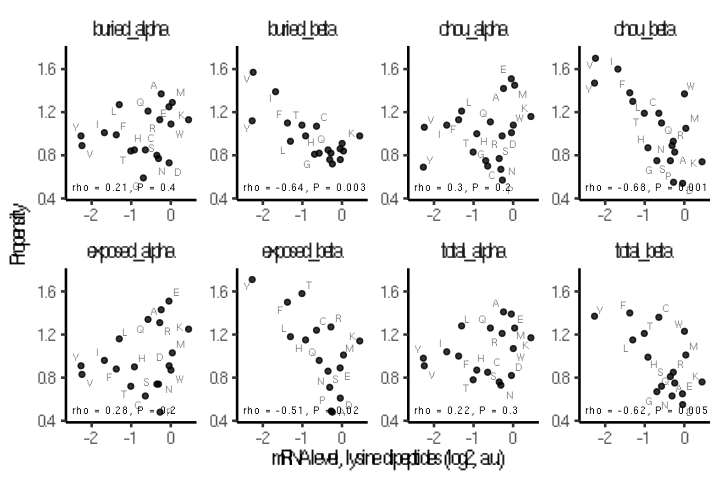

In [45]:
options(repr.plot.width=6, repr.plot.height=4)

plot_data <- dipeptide_lfc %>% 
  drop_na() %>% 
  filter(!str_detect(diaa, "\\*")) %>% 
  filter(str_detect(diaa, "K")) %>% 
  mutate(diaa = if_else(aa1 < aa2, diaa, paste0(aa2, aa1))) %>% 
  group_by(diaa) %>% 
  mutate(mean_lfc = mean(lfc)) %>% 
  ungroup() %>% 
  filter(aa1 == "K") %>% 
  dplyr::rename(aa = aa2) %>% 
  select(-aa1) %>% 
  left_join(chou_fasman_values, by = "aa") %>% 
  print()

label_data <- plot_data %>% 
  group_by(propensity) %>% 
  nest() %>% 
  mutate(fit = map(data, function(df) cor.test(~ mean_lfc + value, df, method = "spearman"))) %>% 
  mutate(fit = map(fit, broom::tidy)) %>% 
  unnest(fit) %>% 
  mutate(estimate = paste0("rho = ", round(estimate, 2), ", P = ", format.pval(p.value, digits=1)))

plot_data %>%
  # Write figure source data tsv file
  write_tsv('../../../../data/source_data_files/fig_3c_source_data.tsv') %>%
  ggplot(aes(x = mean_lfc, y = value, label = aa)) +
  facet_wrap(~ propensity, ncol = 4, scales = "free") +
  # geom_smooth(method = "lm", se = FALSE, linetype = "dashed", alpha = 0.3, color = "lightblue")+
  ggrepel::geom_text_repel(alpha = 0.5, size=2, force_pull = 100, force=0.01) +
  geom_point(size = 1, alpha = 0.8) +
  geom_text(aes(label = estimate), x = -2.5, y = 0.5, data = label_data, size = 2, hjust = 0) +
  scale_x_continuous(limits = c(-2.5, 0.5), breaks = c(-2, -1, 0)) +
  scale_y_continuous(limits = c(0.45, 1.75)) +
  # geom_smooth(method = "lm", se = FALSE, linetype = "dashed", alpha = 0.5, color = "grey")+
  labs(x = "mRNA level, lysine dipeptides (log2, a.u.)", y = "Propensity") +
  NULL

ggsave("../figures/chou_fasman_lys_correlation.pdf", width= 6, height= 4)        

### Plot Arginine dipeptide effects against Chou-Fasman values

- Take the average effects of Arginine in the 1st and 2nd position, for each dipeptide combination

# A tibble: 160 × 14
   insert_num dicodon diaa  codon1 codon2 aa    count_…¹ count…² n_bar…³ n_bar…⁴
        <dbl> <chr>   <chr> <chr>  <chr>  <chr>    <dbl>   <dbl>   <dbl>   <dbl>
 1        529 AGACAC  HR    AGA    CAC    H       125059   20163     180     125
 2        529 AGACAC  HR    AGA    CAC    H       125059   20163     180     125
 3        529 AGACAC  HR    AGA    CAC    H       125059   20163     180     125
 4        529 AGACAC  HR    AGA    CAC    H       125059   20163     180     125
 5        529 AGACAC  HR    AGA    CAC    H       125059   20163     180     125
 6        529 AGACAC  HR    AGA    CAC    H       125059   20163     180     125
 7        529 AGACAC  HR    AGA    CAC    H       125059   20163     180     125
 8        529 AGACAC  HR    AGA    CAC    H       125059   20163     180     125
 9        556 AGAGTA  RV    AGA    GTA    V       299866  141682     363     363
10        556 AGAGTA  RV    AGA    GTA    V       299866  141682     363     363
# … wit

Warning message in cor.test.default(x = c(-2.52519123191615, -0.909320412988066, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.52519123191615, -0.909320412988066, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.52519123191615, -0.909320412988066, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.52519123191615, -0.909320412988066, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.52519123191615, -0.909320412988066, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-2.52519123191615, -0.909320412988066, :
“Cannot compute exact p-value with ties”
Warning message:
“Removed 13 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overl

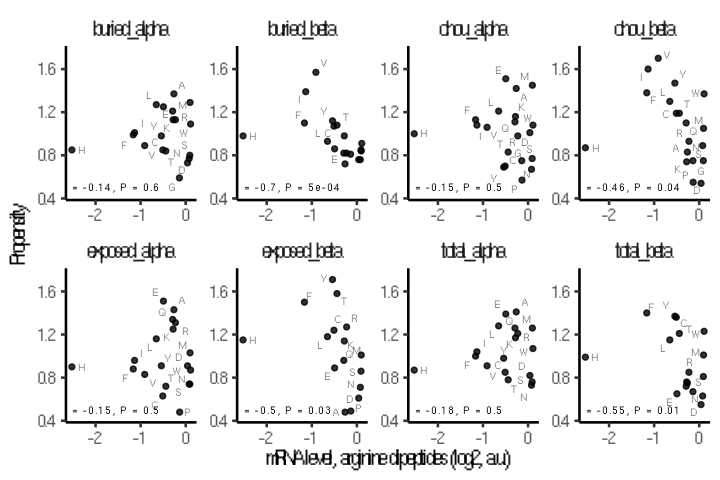

In [44]:
options(repr.plot.width=6, repr.plot.height=4)

plot_data <- dipeptide_lfc %>% 
  drop_na() %>% 
  filter(!str_detect(diaa, "\\*")) %>% 
  filter(str_detect(diaa, "R")) %>% 
  mutate(diaa = if_else(aa1 < aa2, diaa, paste0(aa2, aa1))) %>% 
  group_by(diaa) %>% 
  mutate(mean_lfc = mean(lfc)) %>% 
  ungroup() %>% 
  filter(aa1 == "R") %>% 
  dplyr::rename(aa = aa2) %>% 
  select(-aa1) %>% 
  left_join(chou_fasman_values, by = "aa") %>% 
  print()

label_data <- plot_data %>% 
  group_by(propensity) %>% 
  nest() %>% 
  mutate(fit = map(data, function(df) cor.test(~ mean_lfc + value, df, method = "spearman"))) %>% 
  mutate(fit = map(fit, broom::tidy)) %>% 
  unnest(fit) %>% 
  mutate(estimate = paste0("rho = ", round(estimate, 2), ", P = ", format.pval(p.value, digits=1)))

plot_data %>%
  # Write figure source data tsv file
  write_tsv('../../../../data/source_data_files/fig_s2b_source_data.tsv') %>%
  ggplot(aes(x = mean_lfc, y = value, label = aa)) +
  facet_wrap(~ propensity, ncol = 4, scales = "free") +
  # geom_smooth(method = "lm", se = FALSE, linetype = "dashed", alpha = 0.3, color = "lightblue")+
  ggrepel::geom_text_repel(alpha = 0.5, size=2, force_pull = 100, force=0.01) +
  geom_point(size = 1, alpha = 0.8) +
  geom_text(aes(label = estimate), x = -3, y = 0.5, data = label_data, size = 2, hjust = 0) +
  # scale_x_continuous(limits = c(-2.5, 0.5), breaks = c(-2, -1, 0)) +
  scale_y_continuous(limits = c(0.45, 1.75)) +
  # geom_smooth(method = "lm", se = FALSE, linetype = "dotted", alpha = 0.5, color = "grey")+
  labs(x = "mRNA level, arginine dipeptides (log2, a.u.)", y = "Propensity") +
  NULL  

ggsave("../figures/chou_fasman_arg_correlation.pdf", width= 6, height= 4)      

### Plot Glutamic Acid dipeptide effects against Chou-Fasman values

- Take the average effects of Glutamic Acid in the 1st and 2nd position, for each dipeptide combination

- This is a positive control for the Arg and Lysine effects, since Glutamic acid encoding dipeptides are also predicted to form beta strands. 

# A tibble: 160 × 14
   insert_num dicodon diaa  codon1 codon2 aa    count_…¹ count…² n_bar…³ n_bar…⁴
        <dbl> <chr>   <chr> <chr>  <chr>  <chr>    <dbl>   <dbl>   <dbl>   <dbl>
 1       2105 GAATGC  CE    GAA    TGC    C        74588   46597      98      96
 2       2105 GAATGC  CE    GAA    TGC    C        74588   46597      98      96
 3       2105 GAATGC  CE    GAA    TGC    C        74588   46597      98      96
 4       2105 GAATGC  CE    GAA    TGC    C        74588   46597      98      96
 5       2105 GAATGC  CE    GAA    TGC    C        74588   46597      98      96
 6       2105 GAATGC  CE    GAA    TGC    C        74588   46597      98      96
 7       2105 GAATGC  CE    GAA    TGC    C        74588   46597      98      96
 8       2105 GAATGC  CE    GAA    TGC    C        74588   46597      98      96
 9       2106 GAATGG  EW    GAA    TGG    W        37053   28477      36      43
10       2106 GAATGG  EW    GAA    TGG    W        37053   28477      36      43
# … wit

Warning message in cor.test.default(x = c(-0.516555407554689, 0.0269365496412739, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-0.516555407554689, 0.0269365496412739, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-0.516555407554689, 0.0269365496412739, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-0.516555407554689, 0.0269365496412739, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-0.516555407554689, 0.0269365496412739, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x = c(-0.516555407554689, 0.0269365496412739, :
“Cannot compute exact p-value with ties”
Warning message:
“Removed 13 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 13 rows containing missing values (geom_text_repel).”
Warning message

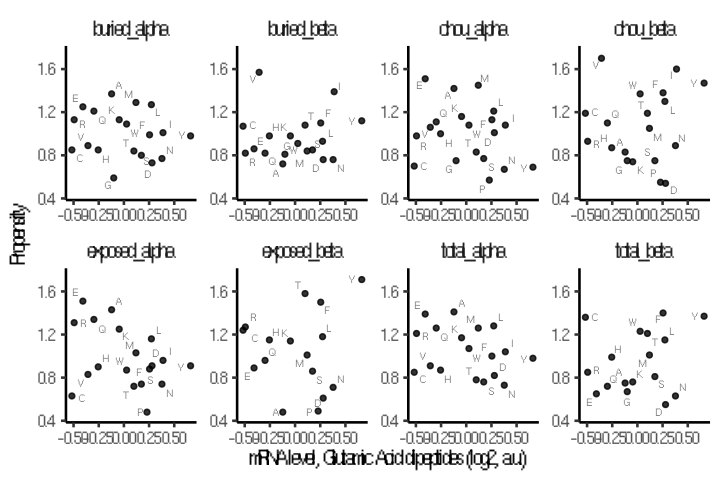

In [43]:
options(repr.plot.width=6, repr.plot.height=4)

plot_data <- dipeptide_lfc %>% 
  drop_na() %>% 
  filter(!str_detect(diaa, "\\*")) %>% 
  filter(str_detect(diaa, "E")) %>% 
  mutate(diaa = if_else(aa1 < aa2, diaa, paste0(aa2, aa1))) %>% 
  group_by(diaa) %>% 
  mutate(mean_lfc = mean(lfc)) %>% 
  ungroup() %>% 
  filter(aa1 == "E") %>% 
  dplyr::rename(aa = aa2) %>% 
  select(-aa1) %>% 
  left_join(chou_fasman_values, by = "aa") %>% 
  print()

label_data <- plot_data %>% 
  group_by(propensity) %>% 
  nest() %>% 
  mutate(fit = map(data, function(df) cor.test(~ mean_lfc + value, df, method = "spearman"))) %>% 
  mutate(fit = map(fit, broom::tidy)) %>% 
  unnest(fit) %>% 
  mutate(estimate = paste0("rho = ", round(estimate, 2), ", P = ", format.pval(p.value, digits=1)))

plot_data %>%
  # Write figure source data tsv file
  write_tsv('../../../../data/source_data_files/fig_s2d_source_data.tsv') %>%
  ggplot(aes(x = mean_lfc, y = value, label = aa)) +
  facet_wrap(~ propensity, ncol = 4, scales = "free") +
  # geom_smooth(method = "lm", se = FALSE, linetype = "dashed", alpha = 0.3, color = "lightblue")+
  ggrepel::geom_text_repel(alpha = 0.5, size=2, force_pull = 100, force=0.01) +
  geom_point(size = 1, alpha = 0.8) +
  geom_text(aes(label = estimate), x = -3, y = 0.5, data = label_data, size = 2, hjust = 0) +
  # scale_x_continuous(limits = c(-2.5, 0.5), breaks = c(-2, -1, 0)) +
  scale_y_continuous(limits = c(0.45, 1.75)) +
  # geom_smooth(method = "lm", se = FALSE, linetype = "dotted", alpha = 0.5, color = "grey")+
  labs(x = "mRNA level, Glutamic Acid dipeptides (log2, a.u.)", y = "Propensity") +
  NULL

ggsave("../figures/chou_fasman_glu_correlation.pdf", width= 6, height= 4)    

### Read in Average S4PRED secondary structure predition values for each dipeptide

In [56]:
avg_s4pred_data <- read_tsv("../tables/avg_dipeptide_s4pred_predictions.tsv") %>% print 

s4pred_values <- avg_s4pred_data %>%  
  filter(insert_name == "8xdicodon") %>% 
  filter(str_detect(aa, "(..)\\1{7}")) %>%
  filter(!str_detect(aa, "\\*")) %>%
  group_by(aa) %>%
  slice(1) %>%
  ungroup() %>%
  mutate(diaa = substr(aa, 1, 2)) %>%
  select(helix, strand, turn, diaa) %>%
  mutate(s4pred = case_when(strand >= 0.5 ~ "strand",
                            helix >= 0.5 ~ "helix",
                            T ~ "other")) %>% 
  print()

Rows: 7936 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): aa, group, insert, insert_name
dbl (5): index, helix, strand, turn, insert_num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 7,936 × 9
   index    helix strand  turn aa               group   insert   inser…¹ inser…²
   <dbl>    <dbl>  <dbl> <dbl> <chr>            <chr>   <chr>    <chr>     <dbl>
 1  2430 0.000934  0.866 0.133 TYTYTYTYTYTYTYTY dicodon ACGTACA… 8xdico…    2430
 2  2302 0.000934  0.866 0.133 TYTYTYTYTYTYTYTY dicodon ACATACA… 8xdico…    2302
 3  2366 0.000934  0.866 0.133 TYTYTYTYTYTYTYTY dicodon ACCTACA… 8xdico…    2366
 4  2496 0.000934  0.866 0.133 TYTYTYTYTYTYTYTY dicodon ACTTATA… 8xdico…    2496
 5  2304 0.000934  0.866 0.133 TYTYTYTYTYTYTYTY dicodon ACATATA… 8xdico…    2304
 6  2432 0.000934  0.866 0.133 TYTYTYTYTYTYTYTY dicodon ACGTATA… 8xdico…    2432
 7  2368 0.000934  0.866 0.133 TYTYTYTYTYTYTYTY dicodon ACCTATA… 8xdico…    2368
 8  2494 0.000934  0.866 0.133 TYTYTYTYTYTYTYTY dicodon ACTTACA… 8xdico…    2494
 9  5121 0.000742  0.854 0.145 YTYTYTYTYTYTYTYT dicodon TACACCT… 8xdico…    5121
10  5248 0.000742  0.854 0.145 YTYTYTYTYTYTYTYT dicodon TATACAT… 8xdico…    5248
# … wi

### Plot all dipeptide effects for different S4 Pred classes

# A tibble: 398 × 16
     helix   strand  turn diaa  s4pred inser…¹ dicodon codon1 codon2 aa1   aa2  
     <dbl>    <dbl> <dbl> <chr> <fct>    <dbl> <chr>   <chr>  <chr>  <chr> <chr>
 1 0.610   0.00109  0.389 AA    helix     2340 GCAGCA  GCA    GCA    A     A    
 2 0.378   0.0496   0.572 AC    other     2361 GCATGC  GCA    TGC    A     C    
 3 0.0584  0.000376 0.941 AD    other     2337 GCAGAC  GCA    GAC    A     D    
 4 0.451   0.00261  0.547 AE    other     2336 GCAGAA  GCA    GAA    A     E    
 5 0.730   0.0149   0.255 AF    helix     2365 GCATTC  GCA    TTC    A     F    
 6 0.00539 0.000626 0.994 AG    other     2344 GCAGGA  GCA    GGA    A     G    
 7 0.0499  0.00230  0.948 AH    other     2321 GCACAC  GCA    CAC    A     H    
 8 0.841   0.00228  0.157 AI    helix     2316 GCAATA  GCA    ATA    A     I    
 9 0.335   0.000843 0.664 AK    other     2304 GCAAAA  GCA    AAA    A     K    
10 0.830   0.000504 0.170 AL    helix     2332 GCACTA  GCA    CTA    A     L    
# … wit

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c()`”


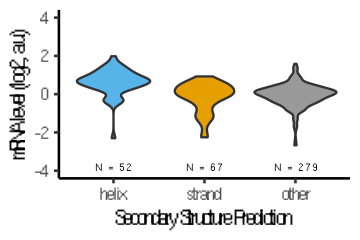

In [41]:
options(repr.plot.width=3, repr.plot.height=2)

plot_data <- s4pred_values %>% 
  inner_join(dipeptide_lfc, by = "diaa") %>% 
  mutate(s4pred = fct_relevel(s4pred, "helix", "strand", "other")) %>% 
  print()

label_data <- plot_data %>% 
  group_by(s4pred) %>% 
  summarize(n = paste0("N = ", dplyr::n())) %>% 
  unnest()

plot_data %>% 
  # Write figure source data tsv file
  # write_tsv('../../../../data/source_data_files/fig_3b_source_data.tsv') %>%
  ggplot(aes(x = s4pred, y = lfc, fill = s4pred)) +
  geom_violin() +
  geom_text(aes(label = n, x = s4pred), y = -3.8, data = label_data, size = 2) +
  scale_fill_manual(values = cbPalette[c(3,2,1)]) +
  scale_y_continuous(limits = c(-4, 4)) +
  # ggpubr::stat_compare_means(comparisons = list(c(1,2), c(1,3), c(2,3)), size = 4) +
  theme(legend.position = "none", axis.title.x = element_text(margin = margin(t = 4))) +
  labs(x = "Secondary Structure Prediction", y = "mRNA level (log2, a.u.)")

ggsave("../figures/s4pred_prediction_dipeptide_effects.pdf", width= 3, height= 2)  

### Plot Arg/Lys content of each S4PRED type

# A tibble: 399 × 6
     helix   strand  turn diaa  s4pred arg_lys
     <dbl>    <dbl> <dbl> <chr> <chr>  <chr>  
 1 0.610   0.00109  0.389 AA    helix  no     
 2 0.378   0.0496   0.572 AC    other  no     
 3 0.0584  0.000376 0.941 AD    other  no     
 4 0.451   0.00261  0.547 AE    other  no     
 5 0.730   0.0149   0.255 AF    helix  no     
 6 0.00539 0.000626 0.994 AG    other  no     
 7 0.0499  0.00230  0.948 AH    other  no     
 8 0.841   0.00228  0.157 AI    helix  no     
 9 0.335   0.000843 0.664 AK    other  yes    
10 0.830   0.000504 0.170 AL    helix  no     
# … with 389 more rows


`summarise()` has grouped output by 's4pred'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
# Groups:   s4pred [3]
  s4pred arg_lys num_arg_lys
  <chr>  <chr>         <int>
1 helix  no               50
2 helix  yes               2
3 other  no              220
4 other  yes              60
5 strand no               53
6 strand yes              14


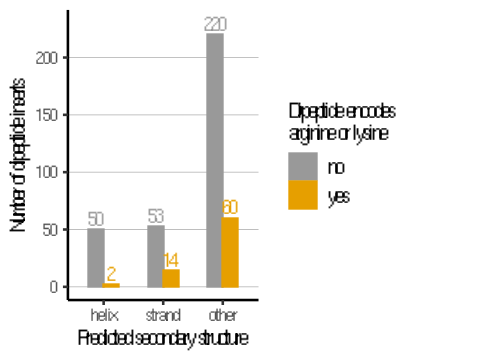

In [40]:
options(repr.plot.width=4, repr.plot.height=3)

barchart_data <- s4pred_values %>% 
  mutate(arg_lys = ifelse(str_detect(diaa, "R|K"), "yes", "no")) %>% print %>% 
  group_by(s4pred, arg_lys) %>% 
  summarise(num_arg_lys = n()) %>% print

barchart_data %>% 
  # Write source data
  # write_tsv('../../../../data/source_data_files/fig_s2a_source_data.tsv') %>% 
  ggplot(aes(x = factor(s4pred, level = c("helix", "strand", "other")), y = num_arg_lys, color = arg_lys, fill = arg_lys)) +
  geom_bar(position = position_dodge(width = 0.5), stat = "identity", width = 0.5) +
  geom_text(aes(label=num_arg_lys), position=position_dodge(width=0.5), vjust=-0.25)+
  scale_color_manual(values = cbPalette, name = "Dipeptide encodes\narginine or lysine")+ 
  scale_fill_manual(values = cbPalette, name = "Dipeptide encodes\narginine or lysine")+
  labs(y = 'Number of dipeptide inserts',
       x = 'Predicted secondary structure') +
  theme(panel.grid.minor =  element_blank(),
        panel.grid.major.y = element_line(size = 0.2, colour="grey")) +
 ylim(0, 230) +
 NULL

ggsave("../figures/dipeptide_arg_lys_content.pdf", width= 4, height= 3)

### Read in position specific S4pred values for each dipeptide

In [46]:
s4pred_pos_data <- read_tsv("../tables/position_specific_dipeptide_s4pred_predictions.tsv") %>% 
  print()

Rows: 380928 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): ss
dbl (3): index, loc, p

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 380,928 × 4
   index   loc ss        p
   <dbl> <dbl> <chr> <dbl>
 1     0     0 turn  0.837
 2     0     1 turn  0.958
 3     0     2 turn  0.977
 4     0     3 turn  0.978
 5     0     4 turn  0.992
 6     0     5 turn  0.994
 7     0     6 turn  0.995
 8     0     7 turn  0.996
 9     0     8 turn  0.997
10     0     9 turn  0.998
# … with 380,918 more rows


### Find SFKV-type motifs

- Alpha helix vs beta strand test, secondary structure probabilities.

In [57]:
sfkv_motifs = c("SFKV", "FSVK", "VKFS", "KVSF", "SFVK", "FSKV", "VKSF", "KVFS") %>% 
  enframe("order", "aa") %>% 
  select(aa, order) %>% 
  deframe() %>% 
  print()

sfkv <- avg_s4pred_data %>% 
  filter(str_detect(insert_name, "mix")) %>% 
  mutate(dicodon1 = str_extract(insert_name, "(?<=codons_)[ACTG]{6}")) %>% 
  mutate(dicodon2 = str_extract(insert_name, "(?<=codons_[ACTG]{6}_)[ACTG]{6}")) %>%
  mutate(repeat_length = as.integer(str_extract(insert_name, "[:digit:]$"))) %>% 
  mutate(aa = as.character(translate(DNAStringSet(str_c(dicodon1, dicodon2))))) %>% 
  filter(aa %in% names(sfkv_motifs), repeat_length == 1) %>% 
  select(-insert,-insert_name) %>% 
  print()

SFKV FSVK VKFS KVSF SFVK FSKV VKSF KVFS 
   1    2    3    4    5    6    7    8 
# A tibble: 8 × 10
  index   helix  strand  turn aa    group insert_num dicodon1 dicodon2 repeat_…¹
  <dbl>   <dbl>   <dbl> <dbl> <chr> <chr>      <dbl> <chr>    <chr>        <int>
1   185 0.00411 0.732   0.264 SFKV  didi         185 AGTTTC   AAAGTC           1
2   242 0.00530 0.713   0.281 VKFS  didi         242 GTCAAA   TTCAGT           1
3   170 0.00403 0.708   0.288 KVSF  didi         170 AAAGTC   AGTTTC           1
4   257 0.00547 0.706   0.289 FSVK  didi         257 TTCAGT   GTCAAA           1
5   245 0.599   0.00360 0.398 FSKV  didi         245 TTCAGT   AAAGTC           1
6   233 0.710   0.00357 0.286 VKSF  didi         233 GTCAAA   AGTTTC           1
7   182 0.712   0.00261 0.286 KVFS  didi         182 AAAGTC   TTCAGT           1
8   194 0.731   0.00248 0.266 SFVK  didi         194 AGTTTC   GTCAAA           1
# … with abbreviated variable name ¹​repeat_length


# A tibble: 384 × 13
   index   helix strand  turn aa    group insert…¹ dicod…² dicod…³ repea…⁴   loc
   <dbl>   <dbl>  <dbl> <dbl> <fct> <chr>    <dbl> <chr>   <chr>     <int> <dbl>
 1   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     0
 2   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     1
 3   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     2
 4   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     3
 5   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     4
 6   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     5
 7   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     6
 8   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     7
 9   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     8
10   185 0.00411  0.732 0.264 SFKV  didi       185 AGTTTC  AAAGTC        1     9
# … wit

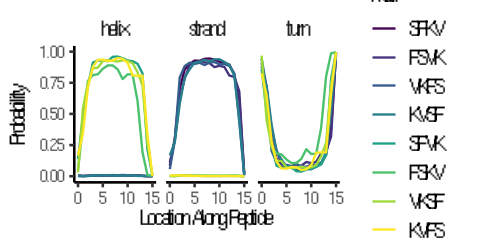

In [64]:
options(repr.plot.width=4, repr.plot.height=2)

plot_data <- sfkv %>% 
  left_join(s4pred_pos_data, by = 'index') %>% 
  mutate(aa = fct_reorder(aa, sfkv_motifs[aa])) %>% 
  print()

plot_data %>% 
  # Write source data
  # write_tsv('../../../../data/source_data_files/fig_4a_source_data.tsv') %>% 
  ggplot(aes(x = loc, y = p, color = aa, group = aa)) +
  facet_wrap(~ ss, ncol = 3) +
  geom_line() +
  scale_color_viridis_d() +
  labs(x = "Location Along Peptide", y = "Probability", color = "Motif") +
  NULL  

ggsave("../figures/sfkv_type_s4pred_predictions.pdf", width= 4, height= 2)  

### Find repeat length varying dicodons

In [71]:
dicodon_motifs <- c("VK", "KF", "SF", "FS", "KI", "RF", "KF", "YK", "RH") %>% 
  enframe("order", "aa") %>% 
  select(aa, order) %>% 
  deframe() %>% 
  print()


dicodon_stalls <- avg_s4pred_data %>% 
  filter(str_detect(insert_name, "length")) %>%
  mutate(dicodon = str_extract(insert_name, "(?<=length_)[ACTG]{6}")) %>%
  mutate(repeat_length = as.integer(str_extract(insert_name, "[:digit:]$"))) %>%
  # select(index, dicodon, repeat_length) %>%
  mutate(aa = as.character(translate(DNAStringSet(dicodon)))) %>% 
  filter(repeat_length == 8) %>%
  filter(aa %in% names(dicodon_motifs)) %>%
  select(-insert,-insert_name) %>% 
  print()

index,helix,strand,turn,aa,group,insert,insert_name,insert_num
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
2430,0.0009340543,0.8663836,0.1326824,TYTYTYTYTYTYTYTY,dicodon,ACGTACACGTACACGTACACGTACACGTACACGTACACGTACACGTAC,8xdicodon,2430
2302,0.0009340543,0.8663836,0.1326824,TYTYTYTYTYTYTYTY,dicodon,ACATACACATACACATACACATACACATACACATACACATACACATAC,8xdicodon,2302
2366,0.0009340543,0.8663836,0.1326824,TYTYTYTYTYTYTYTY,dicodon,ACCTACACCTACACCTACACCTACACCTACACCTACACCTACACCTAC,8xdicodon,2366
2496,0.0009340543,0.8663836,0.1326824,TYTYTYTYTYTYTYTY,dicodon,ACTTATACTTATACTTATACTTATACTTATACTTATACTTATACTTAT,8xdicodon,2496
2304,0.0009340543,0.8663836,0.1326824,TYTYTYTYTYTYTYTY,dicodon,ACATATACATATACATATACATATACATATACATATACATATACATAT,8xdicodon,2304
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3144,0.4663650,9.892370e-05,0.5335360,QKQKQKQKQKQKQKQK,dicodon,CAGAAACAGAAACAGAAACAGAAACAGAAACAGAAACAGAAACAGAAA,8xdicodon,3144
3016,0.4663650,9.892370e-05,0.5335360,QKQKQKQKQKQKQKQK,dicodon,CAAAAACAAAAACAAAAACAAAAACAAAAACAAAAACAAAAACAAAAA,8xdicodon,3016
3018,0.4663650,9.892370e-05,0.5335360,QKQKQKQKQKQKQKQK,dicodon,CAAAAGCAAAAGCAAAAGCAAAAGCAAAAGCAAAAGCAAAAGCAAAAG,8xdicodon,3018


VK KF SF FS KI RF KF YK RH 
 1  2  3  4  5  6  7  8  9 
# A tibble: 7 × 9
  index    helix   strand  turn aa    group insert_num dicodon repeat_length
  <dbl>    <dbl>    <dbl> <dbl> <chr> <chr>      <dbl> <chr>           <int>
1   127 0.000957 0.712    0.287 VK    didi         127 GTCAAA              8
2    39 0.00295  0.680    0.317 SF    didi          39 AGTTTC              8
3    79 0.00472  0.622    0.373 RF    didi          79 CGCTTC              8
4     7 0.00794  0.611    0.381 KI    didi           7 AAGATC              8
5    15 0.00542  0.501    0.494 KF    didi          15 AAGTTC              8
6   143 0.00832  0.214    0.778 YK    didi         143 TACAAG              8
7    71 0.0174   0.000351 0.982 RH    didi          71 CGCCAT              8


### Plot secondary structure prediction of dicodon motifs

# A tibble: 336 × 12
   index    helix strand  turn aa    group insert_…¹ dicodon repea…²   loc ss   
   <dbl>    <dbl>  <dbl> <dbl> <fct> <chr>     <dbl> <chr>     <int> <dbl> <chr>
 1   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     0 turn 
 2   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     1 turn 
 3   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     2 turn 
 4   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     3 turn 
 5   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     4 turn 
 6   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     5 turn 
 7   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     6 turn 
 8   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     7 turn 
 9   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     8 turn 
10   127 0.000957  0.712 0.287 VK    didi        127 GTCAAA        8     9 turn 
# … wit

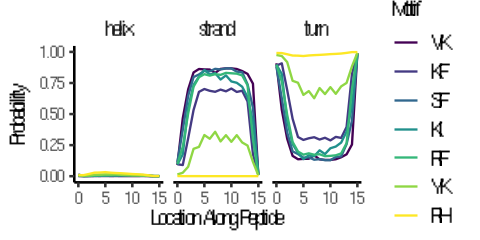

In [74]:

plot_data <- dicodon_stalls %>% 
  left_join(s4pred_pos_data, by = 'index') %>% 
  mutate(aa = fct_reorder(aa, dicodon_motifs[aa])) %>% 
  print()

plot_data %>% 
  # Write source data
  # write_tsv('../../../../data/source_data_files/fig_3a_source_data.tsv') %>% 
  ggplot(aes(x = loc, y = p, color = aa, group = aa)) +
  facet_wrap(~ ss, ncol = 3) +
  geom_line() +
  scale_color_viridis_d() +
  labs(x = "Location Along Peptide", y = "Probability", color = "Motif") +
  NULL  

ggsave("../figures/dipeptide_s4pred_predictions.pdf", width= 4, height= 2)    

### Plot Glutamic Acid dipeptide structure predictions

EF EI VE YE 
 1  2  3  4 
# A tibble: 22 × 8
   index   helix strand  turn aa    group   insert_num dicodon
   <dbl>   <dbl>  <dbl> <dbl> <chr> <chr>        <dbl> <chr>  
 1  4175 0.00391  0.727 0.269 EI    dicodon       4175 GAGATT 
 2  4045 0.00391  0.727 0.269 EI    dicodon       4045 GAAATC 
 3  4173 0.00391  0.727 0.269 EI    dicodon       4173 GAGATC 
 4  4172 0.00391  0.727 0.269 EI    dicodon       4172 GAGATA 
 5  4047 0.00391  0.727 0.269 EI    dicodon       4047 GAAATT 
 6  4044 0.00391  0.727 0.269 EI    dicodon       4044 GAAATA 
 7  5022 0.00128  0.699 0.300 VE    dicodon       5022 GTTGAA 
 8  5024 0.00128  0.699 0.300 VE    dicodon       5024 GTTGAG 
 9  4894 0.00128  0.699 0.300 VE    dicodon       4894 GTCGAA 
10  4896 0.00128  0.699 0.300 VE    dicodon       4896 GTCGAG 
# … with 12 more rows


index,helix,strand,turn,aa,group,insert_num,dicodon
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
4175,0.003908603,0.7266235,0.2694679,EI,dicodon,4175,GAGATT
4045,0.003908603,0.7266235,0.2694679,EI,dicodon,4045,GAAATC
4173,0.003908603,0.7266235,0.2694679,EI,dicodon,4173,GAGATC
4172,0.003908603,0.7266235,0.2694679,EI,dicodon,4172,GAGATA
4047,0.003908603,0.7266235,0.2694679,EI,dicodon,4047,GAAATT
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
4223,0.003475067,0.5784413,0.4180837,EF,dicodon,4223,GAGTTT
5150,0.010629988,0.2911061,0.6982639,YE,dicodon,5150,TACGAG
5148,0.010629988,0.2911061,0.6982639,YE,dicodon,5148,TACGAA


# A tibble: 1,056 × 11
   index   helix strand  turn aa    group   insert_…¹ dicodon   loc ss         p
   <dbl>   <dbl>  <dbl> <dbl> <chr> <chr>       <dbl> <chr>   <dbl> <chr>  <dbl>
 1  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      0 turn  0.823 
 2  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      1 turn  0.671 
 3  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      2 turn  0.312 
 4  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      3 turn  0.155 
 5  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      4 turn  0.0962
 6  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      5 turn  0.0784
 7  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      6 turn  0.0768
 8  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      7 turn  0.0922
 9  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      8 turn  0.103 
10  4175 0.00391  0.727 0.269 EI    dicodon      4175 GAGATT      9 turn  0.115 
# … w

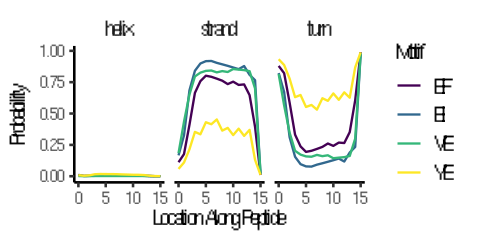

In [102]:
control_motifs <- c("EF","EI", "VE", "YE") %>% 
  enframe("order", "aa") %>% 
  select(aa, order) %>% 
  deframe() %>% 
  print()

glu_controls <- avg_s4pred_data %>% 
  filter(str_detect(insert_name, "8xdicodon")) %>% 
  mutate(dicodon = str_extract(insert, "([ACTG]{6})(?=\\1{7})")) %>% 
  drop_na() %>%
  mutate(aa = as.character(translate(DNAStringSet(dicodon)))) %>% 
  filter(aa %in% names(control_motifs)) %>% 
  select(-insert,-insert_name) %>% print

plot_data <- glu_controls %>% 
  left_join(s4pred_pos_data, by = 'index') %>% 
  print()

plot_data %>%
  # Write source data
  write_tsv('../../../../data/source_data_files/fig_s2c_source_data.tsv') %>% 
  ggplot(aes(x = loc, y = p, color = aa, group = aa)) +
  facet_wrap(~ ss, ncol = 3) +
  geom_line() +
  scale_color_viridis_d() +
  labs(x = "Location Along Peptide", y = "Probability", color = "Motif") +
  NULL  

ggsave("../figures/glutamic_acid_s4pred_predictions.pdf", width= 4, height= 2)    